In [ ]:
pip install pynamics

     |████████████████████████████████| 87 kB 2.7 MB/s 


In [ ]:
pip install idealab_tools

In [ ]:
%matplotlib inline

In [ ]:
use_constraints = True

In [ ]:
import pynamics
from pynamics.frame import Frame
import idealab_tools.units
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
from pynamics.constraint import KinematicConstraint,AccelerationConstraint

In [ ]:
import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
system = System()
pynamics.set_system(__name__,system)

In [ ]:
idealab_tools.units.Unit.set_scaling(meter=1)

In [ ]:
lA = Constant(4.5*idealab_tools.units.length,'lA',system)
lB = Constant(9*idealab_tools.units.length,'lB',system)
lC = Constant(7*idealab_tools.units.length,'lC',system)
lD = Constant(13*idealab_tools.units.length,'lD',system)

m = Constant(1*idealab_tools.units.mass,'m',system)

g = Constant(9.81*idealab_tools.units.acceleration,'g',system)
b = Constant(1e1,'b',system) #dampening coefficient
k = Constant(1e2,'k',system) 

preload1 = Constant(-135*pi/180,'preload1',system)
preload2 = Constant(50*pi/180,'preload2',system)
preload3 = Constant(15*pi/180,'preload3',system)
preload4 = Constant(-90*pi/180,'preload4',system)

Ixx_A = Constant(1*idealab_tools.units.inertia,'Ixx_A',system)
Iyy_A = Constant(1*idealab_tools.units.inertia,'Iyy_A',system)
Izz_A = Constant(1*idealab_tools.units.inertia,'Izz_A',system)
Ixx_B = Constant(1*idealab_tools.units.inertia,'Ixx_B',system)
Iyy_B = Constant(1*idealab_tools.units.inertia,'Iyy_B',system)
Izz_B = Constant(1*idealab_tools.units.inertia,'Izz_B',system)
Ixx_C = Constant(1*idealab_tools.units.inertia,'Ixx_C',system)
Iyy_C = Constant(1*idealab_tools.units.inertia,'Iyy_C',system)
Izz_C = Constant(1*idealab_tools.units.inertia,'Izz_C',system)
Ixx_D = Constant(1*idealab_tools.units.inertia,'Ixx_D',system)
Iyy_D = Constant(1*idealab_tools.units.inertia,'Iyy_D',system)
Izz_D = Constant(1*idealab_tools.units.inertia,'Izz_D',system)

torque = Constant(4e2,'torque',system)
freq = Constant(1e0,'freq',system)

In [ ]:
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qD,qD_d,qD_dd = Differentiable('qD',system)

In [ ]:
initialvalues = {}
initialvalues[qA]=-135*pi/180*idealab_tools.units.radian
initialvalues[qA_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qB]=50*pi/180*idealab_tools.units.radian
initialvalues[qB_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qC]=15*pi/180*idealab_tools.units.radian
initialvalues[qC_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qD]=-90*pi/180*idealab_tools.units.radian
initialvalues[qD_d]=0*pi/180*idealab_tools.units.rotational_speed

In [ ]:
statevariables = system.get_state_variables()

In [ ]:
N = Frame('N',system)
A = Frame('A',system)
B = Frame('B',system)
C = Frame('C',system)
D = Frame('D',system)

In [ ]:
system.set_newtonian(N)

In [ ]:
A.rotate_fixed_axis(N,[0,0,1],qA,system)
B.rotate_fixed_axis(A,[0,0,1],qB,system)
C.rotate_fixed_axis(N,[0,0,1],qC,system)
D.rotate_fixed_axis(C,[0,0,1],qD,system)

In [ ]:
pNA = 0*N.x
pAB = pNA + lA*A.x
pBD = pAB + lB*B.x
pCD = pNA + lC*C.x
#pCtip = pBD + lC*C.x
pDB = pCD + lD*D.x
#eq = [lA*A.x + lB*B.x - lC*C.x - lD*D.x]

In [ ]:
points = [pBD,pAB,pNA,pCD,pDB]

In [ ]:
statevariables = system.get_state_variables()
ini0 = [initialvalues[item] for item in statevariables]

In [ ]:
eq = []
#eq.append(pBD-pCD)
eq.append(pBD-pDB)

print(pNA - pAB)
print(pNA - pBD)
print(pNA - pCD)
print(pNA - pDB)

print(pAB - pBD)
print(pAB - pCD)
print(pAB - pDB)

print(pBD - pCD)
print(pBD - pDB)

print(pCD - pDB)
print(pDB - pAB)





-lA*A.x
-lA*A.x - lB*B.x
-lC*C.x
-lC*C.x - lD*D.x
-lB*B.x
lA*A.x - lC*C.x
lA*A.x - lC*C.x - lD*D.x
lA*A.x + lB*B.x - lC*C.x
lA*A.x + lB*B.x - lC*C.x - lD*D.x
-lD*D.x
-lA*A.x + lC*C.x + lD*D.x


In [ ]:
eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))
#eq_scalar.append(eq[0].dot(C.x))
#eq_scalar.append(eq[0].dot(C.y))

In [ ]:
c=KinematicConstraint(eq_scalar)

In [ ]:
#variables = [qB,qD]
variables = [qA,qB,qC,qD]

In [ ]:
constant_states = list(set(system.get_q(0))-set(variables))

In [ ]:
constants = system.constant_values.copy()

In [ ]:
for key in constant_states:
    constants[key] = initialvalues[key] 

In [ ]:
guess = [initialvalues[item] for item in variables]

In [ ]:
result = c.solve_numeric(variables,guess,constants)


In [ ]:
ini = []
for item in system.get_state_variables():
    if item in variables:
        ini.append(result[item])
    else:
        ini.append(initialvalues[item])

2022-04-07 06:32:05,937 - pynamics.output - INFO - calculating outputs
2022-04-07 06:32:05,940 - pynamics.output - INFO - done calculating outputs


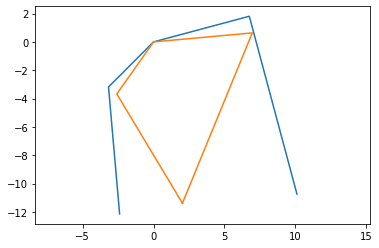

In [ ]:
points = PointsOutput(points, constant_values=system.constant_values)
points.calc(numpy.array([ini0,ini]),[0,1])
points.plot_time()

In [ ]:
pAcm=pNA+lA/2*A.x
pBcm=pAB+lB/2*B.x
pCcm=pNA+lC/2*C.x
pDcm=pCD+lD/2*D.x

In [ ]:
wNA = N.get_w_to(A)
wAB = A.get_w_to(B)
wBC = B.get_w_to(C)
wND = N.get_w_to(D)

In [ ]:
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)

BodyA = Body('BodyA',A,pAcm,m,IA,system)
BodyB = Body('BodyB',B,pBcm,m,IB,system)
BodyC = Body('BodyC',C,pCcm,m,IC,system)
BodyD = Body('BodyD',D,pDcm,m,ID,system)

In [ ]:
system.addforce(torque*sympy.sin(freq*2*sympy.pi*system.t)*A.z,wNA)

#Damper
system.addforce(-b*wNA,wNA)
system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)

In [ ]:
#Spring forces are a special case because the energy stored in springs is conservative and should be considered when calculating the system’s potential energy.
#To do this, use the add_spring_force command. In this method, the first value is the linear spring constant.
#The second value is the “stretch” vector, indicating the amount of deflection from the neutral point of the spring
#The final parameter is, as above, the linear or angluar velocity vector (depending on whether your spring is a linear or torsional spring)
#In this case, the torques applied to each joint are dependent upon whether qA, qB, and qC are absolute or relative rotations, as defined above.
system.add_spring_force1(k,(qA-preload1)*N.z,wNA) 
system.add_spring_force1(k,(qB-preload2)*A.z,wAB)
system.add_spring_force1(k,(qC-preload3)*B.z,wBC)

(<pynamics.force.Force at 0x7f4dfda9e5d0>,
 <pynamics.spring.Spring at 0x7f4dfda9e6d0>)

In [ ]:
system.addforcegravity(-g*N.y)

In [ ]:
eq_d = [item.time_derivative() for item in eq]
eq_dd = [item.time_derivative() for item in eq_d]
eq_dd_scalar = []
eq_dd_scalar.append(eq_dd[0].dot(N.x))
eq_dd_scalar.append(eq_dd[0].dot(N.y))

In [ ]:
system.add_constraint(AccelerationConstraint(eq_dd_scalar))

In [ ]:
f,ma = system.getdynamics()
func1 = system.state_space_post_invert(f,ma)

2022-04-07 06:32:06,743 - pynamics.system - INFO - getting dynamic equations
2022-04-07 06:32:07,144 - pynamics.system - INFO - solving a = f/m and creating function
2022-04-07 06:32:07,392 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-04-07 06:32:07,627 - pynamics.system - INFO - done solving a = f/m and creating function


In [ ]:
fps = 30/(1*idealab_tools.units.time)
tinitial = 0*idealab_tools.units.time
tfinal = 5*idealab_tools.units.time
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]
tolerance = 1e-12

In [ ]:
states=pynamics.integration.integrate_odeint(func1,ini,t,rtol=tolerance,atol=tolerance,args=({'constants':system.constant_values},))

2022-04-07 06:32:07,670 - pynamics.integration - INFO - beginning integration
2022-04-07 06:32:07,672 - pynamics.system - INFO - integration at time 0000.00
2022-04-07 06:32:08,133 - pynamics.system - INFO - integration at time 0001.00
2022-04-07 06:32:08,649 - pynamics.system - INFO - integration at time 0002.75
2022-04-07 06:32:09,521 - pynamics.system - INFO - integration at time 0004.35
2022-04-07 06:32:10,198 - pynamics.integration - INFO - finished integration


In [ ]:
KE = system.get_KE()
PE = system.getPEGravity(pNA) - system.getPESprings()

2022-04-07 06:32:10,286 - pynamics.output - INFO - calculating outputs
2022-04-07 06:32:10,304 - pynamics.output - INFO - done calculating outputs


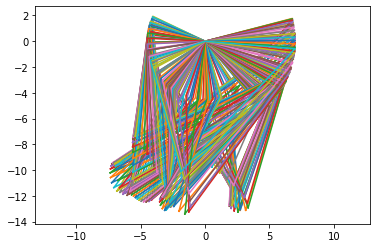

In [ ]:
points.calc(states,t)
points.plot_time()

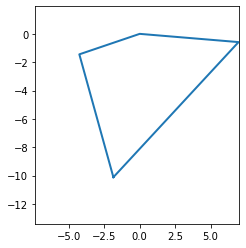

In [ ]:
points.animate(fps = fps,movie_name = 'four_bar.mp4',lw=2)

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(points.anim.to_html5_video())

In [ ]:
system.getdynamics()

2022-04-07 06:32:51,459 - pynamics.system - INFO - getting dynamic equations


([-b*qA_d - b*qB_d + b*(-qA_d + qC_d) - 3*g*lA*m*cos(qA)/2 + g*lB*m*sin(qA)*sin(qB)/2 - g*lB*m*cos(qA)*cos(qB)/2 - k*(-preload1 + qA) + k*(-preload3 + qC) + torque*sin(2*freq*pi*t), -2*b*qB_d + b*(-qA_d + qC_d) + g*lB*m*sin(qA)*sin(qB)/2 - g*lB*m*cos(qA)*cos(qB)/2 - k*(-preload2 + qB) + k*(-preload3 + qC), b*qB_d - b*(-qA_d + qC_d) - 3*g*lC*m*cos(qC)/2 + g*lD*m*sin(qC)*sin(qD)/2 - g*lD*m*cos(qC)*cos(qD)/2 - k*(-preload3 + qC), g*lD*m*sin(qC)*sin(qD)/2 - g*lD*m*cos(qC)*cos(qD)/2], [Izz_A*qA_dd + Izz_B*(qA_dd + qB_dd) + 5*lA**2*m*qA_dd/4 + lA*lB*m*qA_d**2*sin(qB)/2 + lA*lB*m*qA_dd*cos(qB)/2 - lA*lB*m*(qA_d + qB_d)**2*sin(qB)/2 + lA*m*(lB*qA_dd/2 + lB*qB_dd/2)*cos(qB) + lB*m*(lB*qA_dd/2 + lB*qB_dd/2)/2, Izz_B*(qA_dd + qB_dd) + lA*lB*m*qA_d**2*sin(qB)/2 + lA*lB*m*qA_dd*cos(qB)/2 + lB*m*(lB*qA_dd/2 + lB*qB_dd/2)/2, Izz_C*qC_dd + Izz_D*(qC_dd + qD_dd) + 5*lC**2*m*qC_dd/4 + lC*lD*m*qC_d**2*sin(qD)/2 + lC*lD*m*qC_dd*cos(qD)/2 - lC*lD*m*(qC_d + qD_d)**2*sin(qD)/2 + lC*m*(lD*qC_dd/2 + lD*qD_dd/2